In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# data from magicbricks.com
main = pd.read_csv("mllab2data/House_Rent_Dataset.csv")
main

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
main_shuffled = main.sample(frac=1,random_state=42) 
main_shuffled=main_shuffled.replace(to_replace="Super Area",value=1)
main_shuffled=main_shuffled.replace(to_replace="Carpet Area",value=2)
main_shuffled=main_shuffled.replace(to_replace="Built Area",value=3)
main_shuffled=main_shuffled.replace(to_replace="Unfurnished",value=3)
main_shuffled=main_shuffled.replace(to_replace="Furnished",value=1)
main_shuffled=main_shuffled.replace(to_replace="Semi-Furnished",value=2)
main_shuffled

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,1,"Jaya Nagar Block 7, Jayanagar",Bangalore,3,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,1,Manikandan Nagar,Chennai,1,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,2,Bhandup West,Mumbai,2,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,2,Cherlopalli TIRUPATI,Delhi,3,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,2,Gachibowli,Hyderabad,3,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2022-06-29,3,25000,1500,1 out of 2,2,"Ayodhya Nagar, Quthbullapur",Hyderabad,2,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,1,Bansdroni,Kolkata,3,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,2,Vadapalani,Chennai,2,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,2,T Nagar,Chennai,2,Bachelors/Family,3,Contact Agent


In [4]:
# test data
test = main_shuffled.tail(1000)
test

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2467,2022-05-06,3,40000,1650,1 out of 3,2,Dakshini Pitampura,Delhi,2,Bachelors/Family,2,Contact Owner
1645,2022-05-27,2,12000,950,1 out of 2,1,Nri Layout,Bangalore,2,Bachelors/Family,2,Contact Owner
3417,2022-05-20,2,5000,800,Ground out of 2,1,Ayappakkam,Chennai,3,Bachelors/Family,2,Contact Owner
3476,2022-05-09,3,10000,1000,1 out of 8,2,"Kelambakkam, Old Mahabalipuram Road",Chennai,2,Bachelors/Family,3,Contact Owner
3941,2022-06-10,4,25000,1815,2 out of 5,1,Old Bowenpally,Hyderabad,2,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2022-06-29,3,25000,1500,1 out of 2,2,"Ayodhya Nagar, Quthbullapur",Hyderabad,2,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,1,Bansdroni,Kolkata,3,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,2,Vadapalani,Chennai,2,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,2,T Nagar,Chennai,2,Bachelors/Family,3,Contact Agent


In [5]:
training = main_shuffled.drop(test.index)
training

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,1,"Jaya Nagar Block 7, Jayanagar",Bangalore,3,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,1,Manikandan Nagar,Chennai,1,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,2,Bhandup West,Mumbai,2,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,2,Cherlopalli TIRUPATI,Delhi,3,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,2,Gachibowli,Hyderabad,3,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,1,Sarjapur Road,Bangalore,2,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,1,Kompally,Hyderabad,2,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,2,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,2,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,1,Kanathur Reddikuppam,Chennai,3,Bachelors/Family,2,Contact Owner


In [6]:
train = training.sample(frac=0.8,random_state=42)
train

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
46,2022-05-20,2,4600,400,3 out of 3,2,Behala,Kolkata,2,Bachelors,1,Contact Owner
518,2022-06-08,2,45000,1320,Lower Basement out of 2,1,Ballygunge,Kolkata,1,Bachelors/Family,2,Contact Owner
3930,2022-07-06,3,75000,2395,14 out of 17,2,"Vittal Rao Nagar, Hitech City",Hyderabad,2,Family,3,Contact Agent
201,2022-06-24,1,10000,700,1 out of 2,2,Garia,Kolkata,3,Bachelors,1,Contact Owner
3520,2022-07-10,3,65000,1444,11 out of 14,1,Nungambakkam,Chennai,2,Bachelors,3,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2022-06-27,1,6500,450,Ground out of 2,2,Garden City University,Bangalore,2,Bachelors/Family,1,Contact Owner
2293,2022-05-23,1,4000,250,Ground out of 2,1,Vijayanagar,Bangalore,3,Bachelors/Family,1,Contact Owner
1814,2022-06-22,2,9750,575,Ground out of 2,2,Varanasi,Bangalore,2,Bachelors,2,Contact Owner
1950,2022-05-23,2,12000,650,2 out of 4,1,Bommanahalli,Bangalore,2,Bachelors/Family,2,Contact Owner


In [7]:
validation = training.drop(train.index)
validation

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3159,2022-05-12,2,12000,800,2 out of 3,1,Manikandan Nagar,Chennai,1,Bachelors/Family,2,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,2,Gachibowli,Hyderabad,3,Family,5,Contact Agent
4080,2022-06-18,2,12000,500,1 out of 2,1,"Saidabad Colony, Sayeedabad",Hyderabad,1,Bachelors/Family,2,Contact Owner
3792,2022-07-06,4,140000,2600,2 out of 2,2,Ranjith Road,Chennai,2,Bachelors/Family,4,Contact Agent
2323,2022-07-05,3,60000,1850,3 out of 3,2,Halasuru,Bangalore,1,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2022-06-28,3,30000,214,2 out of 2,1,Jubilee Hills,Hyderabad,1,Bachelors,4,Contact Owner
3878,2022-06-28,4,75000,3800,3 out of 10,2,"Financial District, Nanakram Guda",Hyderabad,2,Bachelors/Family,4,Contact Agent
2360,2022-05-05,3,24000,1400,2 out of 4,1,"Jalahalli, Jalahalli, Outer Ring Road",Bangalore,2,Bachelors/Family,3,Contact Owner
3502,2022-06-29,3,60000,1800,9 out of 9,1,in Saligramam,Chennai,2,Bachelors,3,Contact Agent


# Number of rows in training, validation and test sets, along with the structure, datatypes and value counts of the dataframes

In [8]:
print(train.dtypes)
print("The number of rows and columns are :",len(train),",",len(train.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type             int64
Area Locality        object
City                 object
Furnishing Status     int64
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows and columns are : 2997 , 12


In [9]:
print(test.dtypes)
print("The number of rows and columns are :",len(test),",",len(test.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type             int64
Area Locality        object
City                 object
Furnishing Status     int64
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows and columns are : 1000 , 12


In [10]:
print(validation.dtypes)
print("The number of rows and columns are :",len(validation),",",len(validation.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type             int64
Area Locality        object
City                 object
Furnishing Status     int64
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows and columns are : 749 , 12


# Data Cleaning:


* Analyse the data and identify which columns are not relevant for house rent prediction task. Drop 
those columns from the dataframes.*

In [11]:
train.drop(['Posted On','Area Type','Area Locality','Tenant Preferred','Point of Contact'],axis=1)

,BHK,Rent,Size,Floor,City,Furnishing Status,Bathroom
46,2,4600,400,3 out of 3,Kolkata,2,1
518,2,45000,1320,Lower Basement out of 2,Kolkata,1,2
3930,3,75000,2395,14 out of 17,Hyderabad,2,3
201,1,10000,700,1 out of 2,Kolkata,3,1
3520,3,65000,1444,11 out of 14,Chennai,2,3
...,...,...,...,...,...,...,...
2224,1,6500,450,Ground out of 2,Bangalore,2,1
2293,1,4000,250,Ground out of 2,Bangalore,3,1
1814,2,9750,575,Ground out of 2,Bangalore,2,2
1950,2,12000,650,2 out of 4,Bangalore,2,2


####  Check for missing values and logically impute the dataset.

In [12]:
print("FOR NA VALUE:\n",train.isna().sum(),'\n')
print("FOR NULL VALUE:\n",train.isnull().sum(),'\n')
print("From above we can derive that there is no null value and no Na Values, therefore there is no need of logical imputation")

FOR NA VALUE:
 Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

FOR NULL VALUE:
 Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

From above we can derive that there is no null value and no Na Values, therefore there is no need of logical imputation


#####   Identify any categorical valued columns (non-numeric) and convert them to numeric.

In [13]:
print("Didn't Found Any ")

Didn't Found Any 


<AxesSubplot:>

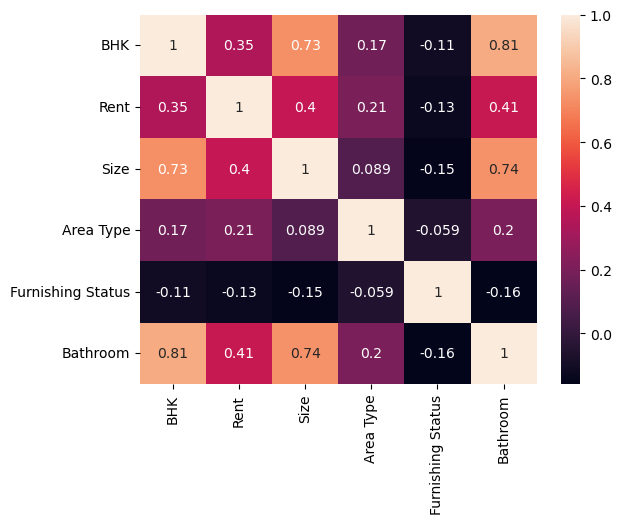

In [14]:
sns.heatmap(train.corr(),annot=True)

# Exploratory Analysis (On training set): 

#### Plot the house rents against the dependent variable of “size”. See if there is a uniform linear trend between the dependent and independent variables. Make accurate axis and legend. Save the plot in a png file.

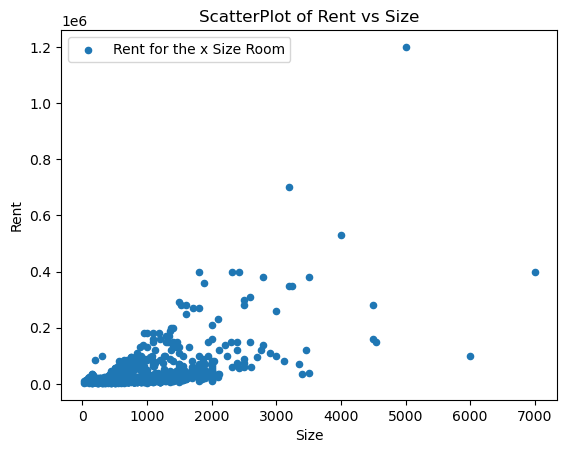

In [15]:
df = train[['Size','Rent']]
df=df.tail(1000)
df.plot(kind='scatter',x='Size',y='Rent')
plt.title('ScatterPlot of Rent vs Size')
plt.legend(["Rent for the x Size Room"])
plt.show()

#### Find average rent prices in different cities and report which city has the highest average rent.

City
Bangalore    27585.763060
Chennai      22145.766372
Delhi        30994.748031
Hyderabad    20448.101266
Kolkata      11909.943953
Mumbai       85821.845907
Name: Rent, dtype: float64
85821.84590690209


Text(0, 0.5, 'Average Rent')

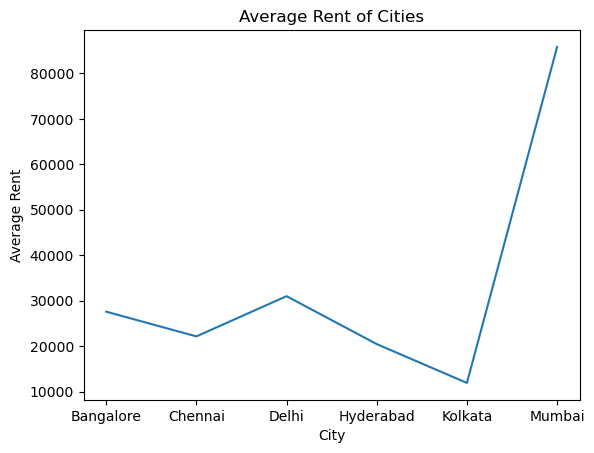

In [16]:
df1 = train[['Rent','City']]
m=df1.groupby(["City"],sort=True)['Rent'].mean()
print(m)
print(m.max())
m.plot()
plt.title("Average Rent of Cities")
plt.ylabel("Average Rent")
# idx=pd.Index(["c1","c2","c3","c4","c5","c6"])
# m.set_index(idx)

# Regression : 

In [17]:
train_part = train[['BHK','Rent','Bathroom']]
train_part

,BHK,Rent,Bathroom
46,2,4600,1
518,2,45000,2
3930,3,75000,3
201,1,10000,1
3520,3,65000,3
...,...,...,...
2224,1,6500,1
2293,1,4000,1
1814,2,9750,2
1950,2,12000,2


In [18]:
model = LinearRegression()

####  Train a linear regression model on the training set partition by taking only one dependent variable of “size”. Calculate the error on the validation set

In [19]:
model.fit(train_part,train['Size'])

LinearRegression()

In [20]:
test_prediction = model.predict(test[['BHK','Rent','Bathroom']])
df2 = pd.DataFrame(data=test_prediction,columns=["Predicted Size"])
df2

,Predicted Size
0,1243.710957
1,933.428892
2,928.085563
3,1495.771253
4,1796.129994
...,...
995,1507.221243
996,1228.444304
997,939.535553
998,1553.021204


In [21]:
df3=train[['Size']].tail(1000)
df3

,Size
4518,3400
1472,700
265,900
1461,774
2340,2390
...,...
2224,450
2293,250
1814,575
1950,650


In [22]:
df3Idx=df3.index.values
df2Idx=df2.index.values

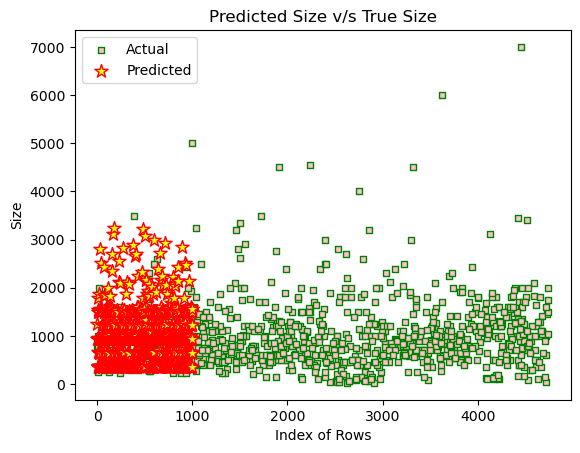

In [23]:

plt.scatter(y=df3['Size'],x=df3Idx,c="pink",linewidths=1,marker="s",edgecolor="green",s=25)
plt.scatter(y=df2['Predicted Size'],x=df2Idx,c="yellow",linewidths=1,marker="*",edgecolor="red",s=100)
plt.title("Predicted Size v/s True Size")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index of Rows")
plt.ylabel("Size")
plt.show()

In [24]:
mae = mean_absolute_error(test['Size'],test_prediction)
mae

272.23283544227377

In [25]:
mse = mean_squared_error(test['Size'],test_prediction)
mse

184862.6749401498

####  Create a function for calculating the RMSE values for the predictions Vs the actual ground truth rent  values. RMSE = SQRT( Σ ( (F(xi) - yi)2)/N ), Here F(x) are the prediction values, N are the number of rows

In [26]:
rmse = np.sqrt(mse)
rmse

429.9565965770845

#### Plot the model predictions of rent values alongside the actual rent values taken for the validation set.Show the legend, axes and color-coded predictions and ground truth for differentiating

In [27]:
train_part1 = train[['BHK','Size','Bathroom']]
train_part1

,BHK,Size,Bathroom
46,2,400,1
518,2,1320,2
3930,3,2395,3
201,1,700,1
3520,3,1444,3
...,...,...,...
2224,1,450,1
2293,1,250,1
1814,2,575,2
1950,2,650,2


In [28]:
model = LinearRegression()

In [29]:
model.fit(train_part1,train['Rent'])

LinearRegression()

In [30]:
test_prediction = model.predict(test[['BHK','Size','Bathroom']])
df2 = pd.DataFrame(data=test_prediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,54269.754423
1,36956.390874
2,32291.704281
3,62462.549478
4,83352.172748
...,...
995,78011.504787
996,40275.694646
997,32291.704281
998,140207.326020


In [31]:
df3=train[['Rent']].tail(1000)
df3

,Rent
4518,35000
1472,20000
265,8000
1461,42000
2340,120000
...,...
2224,6500
2293,4000
1814,9750
1950,12000


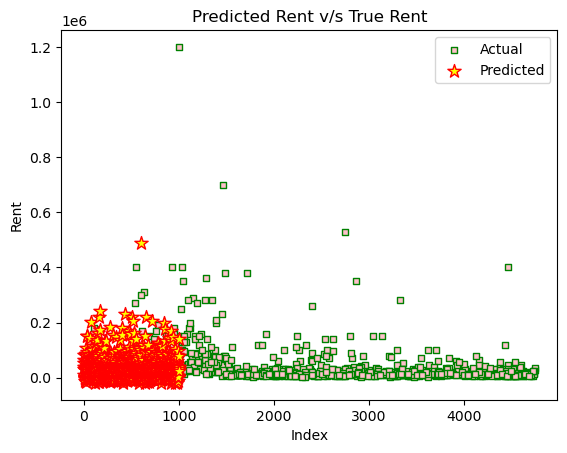

In [32]:
plt.scatter(y=df3['Rent'],x=df3Idx,c="pink",linewidths=1,marker="s",edgecolor="green",s=25)
plt.scatter(y=df2['Predicted Rent'],x=df2Idx,c="yellow",linewidths=1,marker="*",edgecolor="red",s=100)
plt.title("Predicted Rent v/s True Rent")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Rent")
plt.show()

In [33]:
mae = mean_absolute_error(test['Rent'],test_prediction)
mse = mean_squared_error(test['Rent'],test_prediction)
rmse = np.sqrt(mse)
rmse

57766.66921922417

### Train a logistic regression model and check the score for different training iterations. Plot the validation results by varying max_iter as 10, 20, 30, ….

In [34]:
train_part1 = train[['BHK','Size','Bathroom']]
train_part1

,BHK,Size,Bathroom
46,2,400,1
518,2,1320,2
3930,3,2395,3
201,1,700,1
3520,3,1444,3
...,...,...,...
2224,1,450,1
2293,1,250,1
1814,2,575,2
1950,2,650,2


In [35]:
modelL = LogisticRegression(max_iter=10,solver='liblinear')
modelL.fit(train_part1,train['Rent'])
modelL

C:\Users\thero\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=10, solver='liblinear')

In [36]:
Lprediction=modelL.predict(test[['BHK','Size','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,15000
1,15000
2,15000
3,15000
4,15000
...,...
995,15000
996,15000
997,15000
998,15000


In [37]:
mae = mean_absolute_error(test['Rent'],Lprediction)
mse = mean_squared_error(test['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

71637.55118653903

### Try to improve accuracy (on validation set) by considering more features and retraining.

In [38]:
from sklearn.metrics import accuracy_score
score =accuracy_score(test['Rent'],Lprediction)
score

0.056

In [39]:
train_part1 = train[['BHK','Size','Area Type','Bathroom']]
train_part1

,BHK,Size,Area Type,Bathroom
46,2,400,2,1
518,2,1320,1,2
3930,3,2395,2,3
201,1,700,2,1
3520,3,1444,1,3
...,...,...,...,...
2224,1,450,2,1
2293,1,250,1,1
1814,2,575,2,2
1950,2,650,1,2


In [40]:
modelL = LogisticRegression(max_iter=20,solver='liblinear')
modelL.fit(train_part1,train['Rent'])
modelL

C:\Users\thero\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=20, solver='liblinear')

In [41]:
Lprediction=modelL.predict(test[['BHK','Size','Area Type','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,15000
1,15000
2,15000
3,15000
4,15000
...,...
995,15000
996,15000
997,15000
998,200000


In [42]:
mae = mean_absolute_error(test['Rent'],Lprediction)
mse = mean_squared_error(test['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

68475.60339277047

In [43]:
score =accuracy_score(test['Rent'],Lprediction)
score

0.071

In [44]:
train_part1 = train[['BHK','Size','Area Type','Furnishing Status','Bathroom']]
train_part1

,BHK,Size,Area Type,Furnishing Status,Bathroom
46,2,400,2,2,1
518,2,1320,1,1,2
3930,3,2395,2,2,3
201,1,700,2,3,1
3520,3,1444,1,2,3
...,...,...,...,...,...
2224,1,450,2,2,1
2293,1,250,1,3,1
1814,2,575,2,2,2
1950,2,650,1,2,2


In [45]:
modelL = LogisticRegression(max_iter=30,solver='liblinear')
modelL.fit(train_part1,train['Rent'])
modelL

C:\Users\thero\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=30, solver='liblinear')

In [46]:
Lprediction=modelL.predict(test[['BHK','Size','Area Type','Furnishing Status','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,15000
1,15000
2,10000
3,15000
4,15000
...,...
995,15000
996,10000
997,15000
998,30000


In [47]:
mae = mean_absolute_error(test['Rent'],Lprediction)
mse = mean_squared_error(test['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

61256.11357247536

In [48]:
score =accuracy_score(test['Rent'],Lprediction)
score

0.073

In [49]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test['Rent'], Lprediction)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Make predictions on the test set by taking 3 of your best models. Report these 3 accuracy values.